In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
input_col = "Input"
# use_input = False
# min_cell = 10

outdir = "/data/Mito_Trace/output/pipeline/v03/DUPI_april08_2021/MTblacklist_mtasnucl_donors4_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_hg38_1_2/annotation_clones/cluster_clone_counts/sepDonors"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v03/DUPI_april08_2021/MTblacklist_mtasnucl_donors4_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_hg38_1_2/annotation_clones/se_cells_meta_labels.tsv"
use_input = False
min_cell = 10

In [2]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
%matplotlib inline

In [4]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
preB_AAACGAAGTCACTCTC-1,preB,3754,3754,38954,29912,335,145,1057,0,7505,...,0,6119,4303,AAACGAAGTCACTCTC-1_preB,preB_AAACGAAGTCACTCTC-1,9,3,preB,3_9,0
preB_AAACGAAGTCCCTAAA-1,preB,4130,4130,24309,15056,258,113,968,0,7914,...,8,6769,4616,AAACGAAGTCCCTAAA-1_preB,preB_AAACGAAGTCCCTAAA-1,85,0,preB,0_85,8
preB_AAACGAAGTCTGTGTA-1,preB,683,683,17674,15525,189,72,200,0,1688,...,2,921,843,AAACGAAGTCTGTGTA-1_preB,preB_AAACGAAGTCTGTGTA-1,23,2,preB,2_23,2
preB_AAACTCGCAACTCGTA-1,preB,5270,5270,39016,26386,437,223,1941,0,10029,...,8,9208,5457,AAACTCGCAACTCGTA-1_preB,preB_AAACTCGCAACTCGTA-1,1,1,preB,1_1,8
preB_AAACTCGCAGAACGAC-1,preB,5575,5575,70990,51473,759,331,2599,0,15828,...,6,11148,6264,AAACTCGCAGAACGAC-1_preB,preB_AAACTCGCAGAACGAC-1,8,1,preB,1_8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
postB_TTTGGTTTCGAGGTCC-1,postB,1177,1177,14837,9808,125,73,599,0,4232,...,3,2210,1776,TTTGGTTTCGAGGTCC-1_postB,postB_TTTGGTTTCGAGGTCC-1,59,0,postB,0_59,3
postB_TTTGGTTTCTAGCTGA-1,postB,1435,1435,13227,7691,122,69,560,0,4785,...,0,2592,2020,TTTGGTTTCTAGCTGA-1_postB,postB_TTTGGTTTCTAGCTGA-1,91,0,postB,0_91,0
postB_TTTGTGTCACAGTTCA-1,postB,2706,2706,25571,16229,255,162,1063,0,7862,...,0,5130,3415,TTTGTGTCACAGTTCA-1_postB,postB_TTTGTGTCACAGTTCA-1,26,2,postB,2_26,0
postB_TTTGTGTGTGCCGGTT-1,postB,1747,1747,18602,13134,184,104,574,0,4606,...,4,2761,2275,NaN,postB_TTTGTGTGTGCCGGTT-1,None,None,None,None,4


### Remove None before normalizing

In [5]:
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
preB_AAACGAAGTCACTCTC-1,preB,3754,3754,38954,29912,335,145,1057,0,7505,...,0,6119,4303,AAACGAAGTCACTCTC-1_preB,preB_AAACGAAGTCACTCTC-1,9,3,preB,3_9,0
preB_AAACGAAGTCCCTAAA-1,preB,4130,4130,24309,15056,258,113,968,0,7914,...,8,6769,4616,AAACGAAGTCCCTAAA-1_preB,preB_AAACGAAGTCCCTAAA-1,85,0,preB,0_85,8
preB_AAACGAAGTCTGTGTA-1,preB,683,683,17674,15525,189,72,200,0,1688,...,2,921,843,AAACGAAGTCTGTGTA-1_preB,preB_AAACGAAGTCTGTGTA-1,23,2,preB,2_23,2
preB_AAACTCGCAACTCGTA-1,preB,5270,5270,39016,26386,437,223,1941,0,10029,...,8,9208,5457,AAACTCGCAACTCGTA-1_preB,preB_AAACTCGCAACTCGTA-1,1,1,preB,1_1,8
preB_AAACTCGCAGAACGAC-1,preB,5575,5575,70990,51473,759,331,2599,0,15828,...,6,11148,6264,AAACTCGCAGAACGAC-1_preB,preB_AAACTCGCAGAACGAC-1,8,1,preB,1_8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
postB_TTTGGTTTCCTTTGCG-1,postB,762,762,7602,4588,69,52,399,0,2494,...,0,1504,1266,TTTGGTTTCCTTTGCG-1_postB,postB_TTTGGTTTCCTTTGCG-1,40,0,postB,0_40,0
postB_TTTGGTTTCGAGGTCC-1,postB,1177,1177,14837,9808,125,73,599,0,4232,...,3,2210,1776,TTTGGTTTCGAGGTCC-1_postB,postB_TTTGGTTTCGAGGTCC-1,59,0,postB,0_59,3
postB_TTTGGTTTCTAGCTGA-1,postB,1435,1435,13227,7691,122,69,560,0,4785,...,0,2592,2020,TTTGGTTTCTAGCTGA-1_postB,postB_TTTGGTTTCTAGCTGA-1,91,0,postB,0_91,0
postB_TTTGTGTCACAGTTCA-1,postB,2706,2706,25571,16229,255,162,1063,0,7862,...,0,5130,3415,TTTGTGTCACAGTTCA-1_postB,postB_TTTGTGTCACAGTTCA-1,26,2,postB,2_26,0


In [6]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

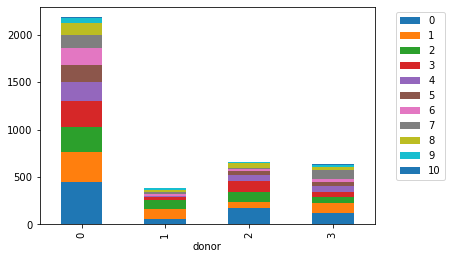

In [7]:
group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_clones_barplot_clones.png"))

### Normalize to each donor

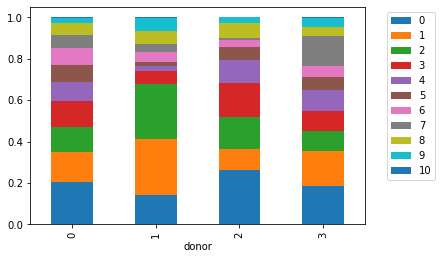

In [8]:
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0)#.plot.bar(stacked=True)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.png"))

In [9]:
def donor_plots(df, name):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(12,12), ncols=len(donors), squeeze=False)
    count = 0
    for d, val in df.groupby("donor"):
        val.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax[0, count])
        ax[0, count].set_title(f"Donor {d}")
        count += 1
        
    plt.savefig(join(outdir, name+".barplot.png"))
    plt.savefig(join(outdir, name+".barplot.pdf"), dpi=300)
    return

In [10]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]


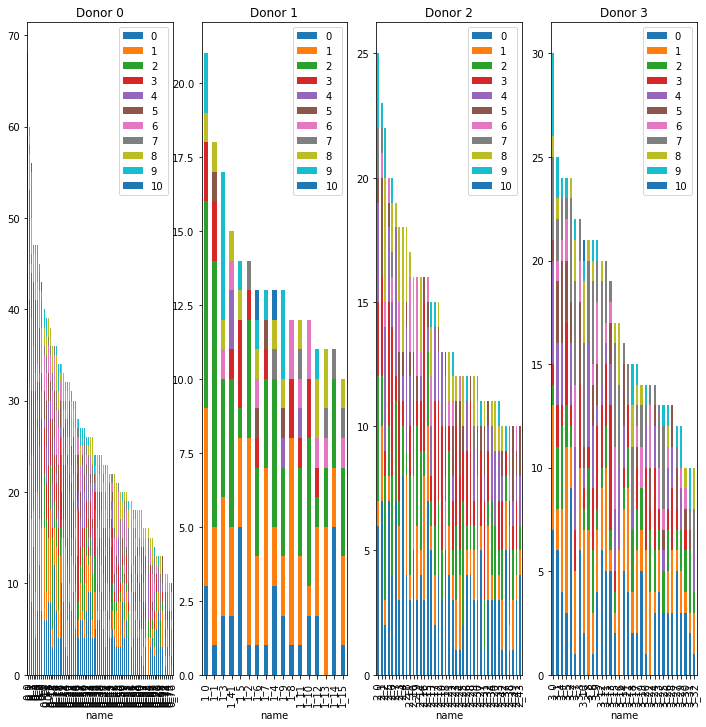

In [11]:
%matplotlib inline
donor_plots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

# Normalize per clone

In [12]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
0_0      68
0_1      60
0_10     40
0_100     3
0_101     3
         ..
3_5      24
3_6      21
3_7      22
3_8      21
3_9      21
Name: ncells, Length: 249, dtype: int64

In [13]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters  donor
0                 0        20.671454
                  1         6.472631
                  2        14.285438
                  3         8.346725
1                 0        14.457300
                  1        11.796766
                  2         4.851807
                  3         6.408994
2                 0        12.045367
                  1        12.499735
                  2         8.359983
                  3         4.952380
3                 0        12.616170
                  1         2.414200
                  2         9.041575
                  3         4.270884
4                 0         9.304815
                  1         1.195971
                  2         5.743720
                  3         4.624890
5                 0         8.025787
                  1         0.879182
                  2         3.128055
                  3         2.536065
6                 0         9.454691
                  1         2.

,donor,ncells,0,1,2,3,4,5,6,7,8,9,10
name,,,,,,,,,,,,,
0_0,0,1.0,0.264706,0.132353,0.117647,0.132353,0.161765,0.058824,0.088235,0.014706,0.014706,0.014706,0.0
2_13,2,1.0,0.333333,0.066667,0.066667,0.066667,0.133333,0.000000,0.133333,0.000000,0.133333,0.066667,0.0
2_15,2,1.0,0.437500,0.187500,0.187500,0.000000,0.062500,0.062500,0.062500,0.000000,0.000000,0.000000,0.0
2_16,2,1.0,0.187500,0.312500,0.062500,0.375000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.0
2_17,2,1.0,0.133333,0.133333,0.133333,0.333333,0.200000,0.000000,0.000000,0.000000,0.000000,0.066667,0.0


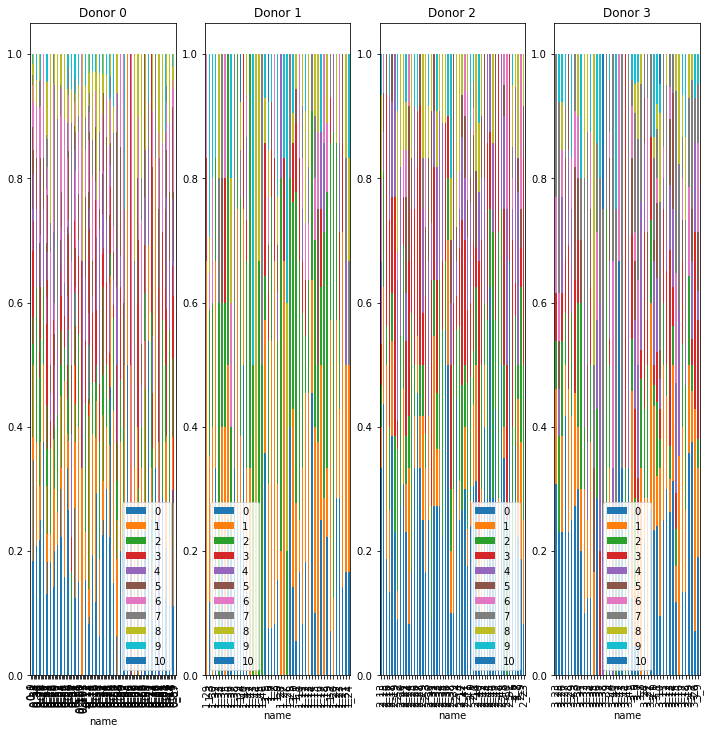

In [14]:
donor_plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [15]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

In [16]:
# from sklearn.datasets import make_blobs
# import colorcet as cc
# import matplotlib.pyplot as plt
# import seaborn as sns

#https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
#palette = sns.color_palette(cc.glasbey, n_colors=25)


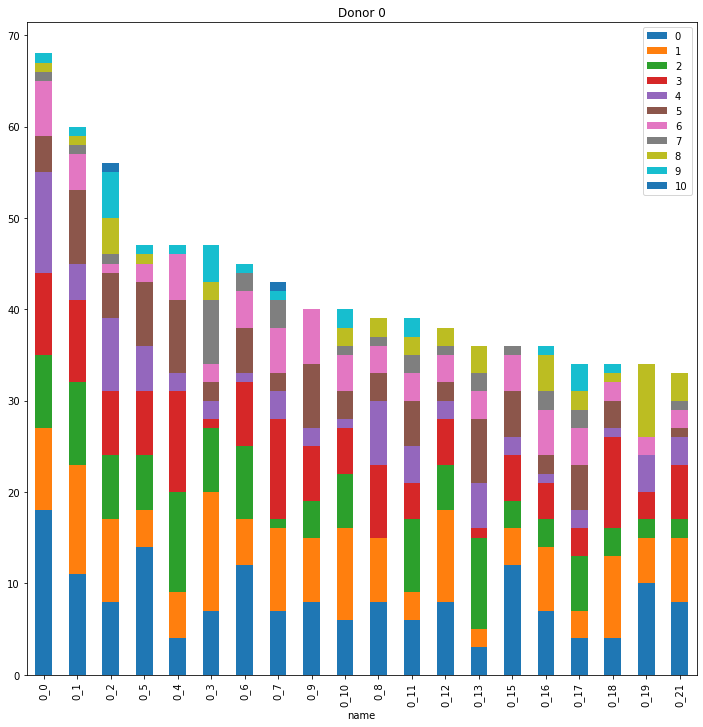

In [17]:
donor_plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_cluster_counts")

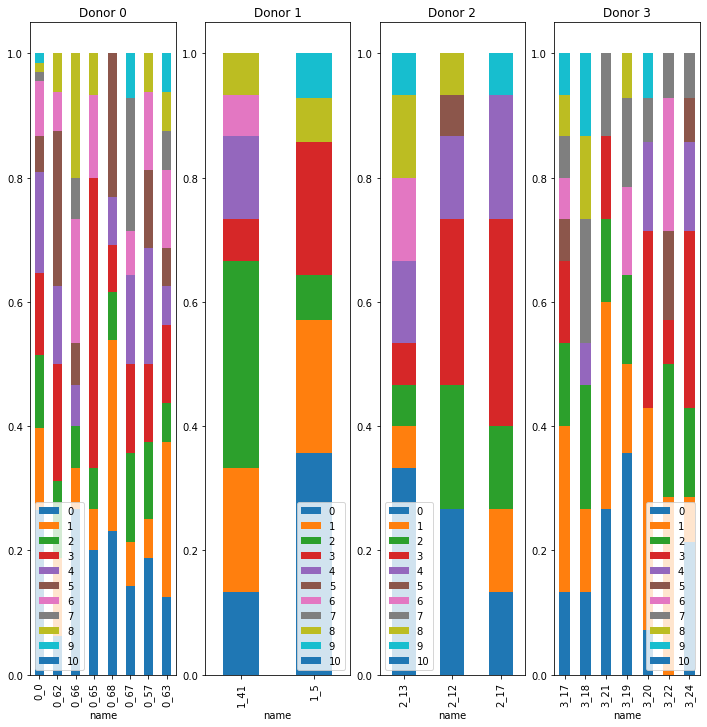

In [18]:
donor_plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")

## Distribution of counts by cluster

---

---

---

---

In [19]:
outdir

'/data/Mito_Trace/output/pipeline/v03/DUPI_april08_2021/MTblacklist_mtasnucl_donors4_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_hg38_1_2/annotation_clones/cluster_clone_counts/sepDonors'